In [9]:
%run coalition-calculations.py

In [10]:
if __name__ == "__main__":
    kabinetten, zetels, ek_zetels, topic_vectors = load_data()
    coalition_counter = build_coalition_frequency(kabinetten)

    # User Input  # <<—— Add the (alleged) seat distribution for the election you want to predict
    seat_distribution = {
        'VVD': 30,
        'GL/PvdA': 28,
        'D66': 10,
        'CDA': 18,
        'CU': 3,
        'PVV': 28,
        'BBB': 2,
        'SP': 8,
        'PvdD': 5,
        'NSC': 2,
        'DENK': 4,
        'FvD': 3,
        'SGP': 3,
        'Volt': 3,
        'JA21': 3
}

    Jaar = 2023  # <<—— Add the election year for Eerste Kamer seat distribution

    predictions = predict_coalitions(
        seat_distribution, 
        coalition_counter, 
        ek_zetels=ek_zetels, 
        Jaar=Jaar, 
        threshold=76, 
        top_k=7,
        topic_vectors=topic_vectors
    )


    for p in predictions:
        print(f"Coalition: {p['coalition']}")
        print(f"  Seats: {p['seats']}")
        print(f"  History Score: {p['historical_score']}")
        print(f"  Ideology Score: {p['ideology_score']}")
        print(f"  EK Score: {p['ek_score']}")  # Optional: show EK alignment
        print(f"  EK Seats: {p['ek_total_seats']}")
        print(f"  JSD Penalty: {p['jsd_penalty']}")
        print(f"  Party Penalty: {p['party_penalty']}")
        print(f"  Surplus Penalty: {p['surplus_penalty']}")
        print(f"  Final Score: {p['final_score']}%")
        print("")


Coalition: ('VVD', 'GL/PvdA', 'CDA', 'NSC')
  Seats: 78
  History Score: 1.05
  Ideology Score: 2.06
  EK Score: 0.4
  EK Seats: 30
  JSD Penalty: 0.06
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 6.6%

Coalition: ('VVD', 'GL/PvdA', 'D66', 'CDA')
  Seats: 86
  History Score: 1.17
  Ideology Score: 2.25
  EK Score: 0.47
  EK Seats: 35
  JSD Penalty: 0.05
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 6.3%

Coalition: ('VVD', 'GL/PvdA', 'CDA', 'CU')
  Seats: 79
  History Score: 1.05
  Ideology Score: 2.18
  EK Score: 0.44
  EK Seats: 33
  JSD Penalty: 0.06
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 3.9%

Coalition: ('VVD', 'GL/PvdA', 'CDA')
  Seats: 76
  History Score: 1.05
  Ideology Score: 2.48
  EK Score: 0.4
  EK Seats: 30
  JSD Penalty: 0.05
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 0%

Coalition: ('VVD', 'GL/PvdA', 'D66', 'SP')
  Seats: 76
  History Score: 1.1
  Ideology Score: 2.41
  EK Score: 0.43
  EK Seats: 32
  JSD Penalty: 0.

In [ ]:
# parties_2023 = {
        # 'VVD': 24,
        # 'GL/PvdA': 25,
        # 'D66': 9,
        # 'CDA': 5,
        # 'CU': 3,
        # 'PVV': 37,
        # 'BBB': 7,
        # 'SP': 5,
        # 'PvdD': 3,
        # 'NSC': 20,
        # 'DENK': 3,
        # 'FvD': 3,
        # 'SGP': 3,
        # 'Volt': 2,
        # 'JA21': 1
# }

# parties_2021 = {
        # 'PVV':17,
        # 'VVD':34,
        # 'D66':24,
        # 'BBB':1,
        # 'CDA':15,
        # 'SP':9,
        # 'FvD':8,
        # 'PvdD':6,
        # 'SGP':3,
        # 'ChristenUnie':5,
        # 'DENK':3,
        # 'Volt':3,
        # 'JA21':3,
        # 'PvdA':9,
        # 'GroenLinks':8,
        # '50Plus':1,
        # 'BIJ1':1,
# }

# peiling_27052025 = {
        # 'VVD': 30,
        # 'GL/PvdA': 28,
        # 'D66': 10,
        # 'CDA': 18,
        # 'CU': 3,
        # 'PVV': 28,
        # 'BBB': 2,
        # 'SP': 8,
        # 'PvdD': 5,
        # 'NSC': 2,
        # 'DENK': 4,
        # 'FvD': 3,
        # 'SGP': 3,
        # 'Volt': 3,
        # 'JA21': 3
# }

/tmp/ipykernel_26554/3936670675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_scores, y=coalitions, palette='viridis')


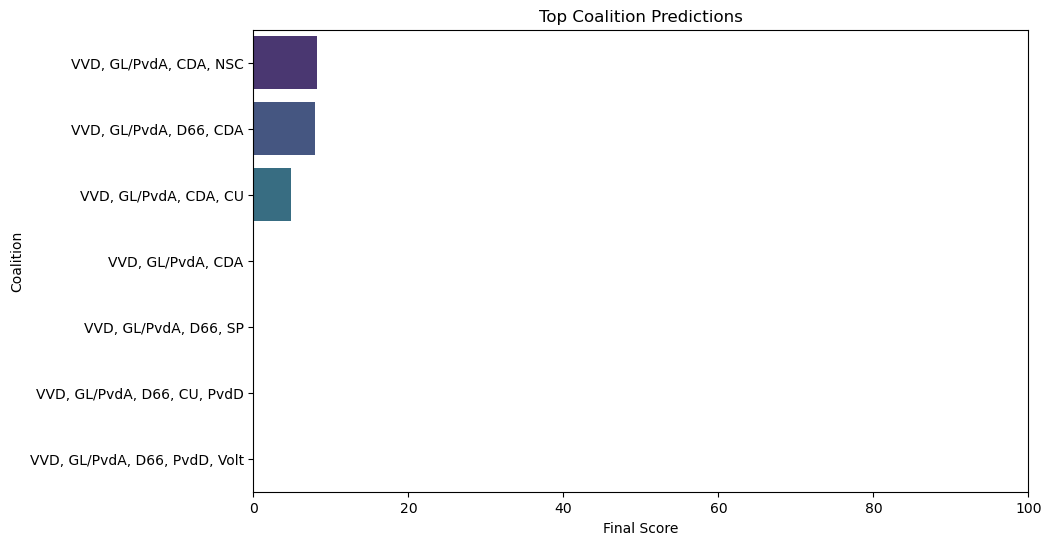

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coalition_scores(predictions):
    coalitions = [', '.join(p['coalition']) for p in predictions]
    final_scores = [p['final_score'] for p in predictions]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=final_scores, y=coalitions, palette='viridis')
    plt.xlabel('Final Score')
    plt.ylabel('Coalition')
    plt.title('Top Coalition Predictions')
    plt.xlim(0, 100)
    plt.show()

plot_coalition_scores(predictions)